In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
#data_playerLoggedIn = pd.read_csv("C:\\Users\\gameuser\\Desktop\\Foldera\\College\\S2\\GA\\GA_25_P1_Part3_Shane_Conroy\\data\\player_logged_in.csv")
data_playerLoggedIn = pd.read_csv("C:\\Users\\El Presidente\\Desktop\\College\\GA_25_P1_Part3_Shane_Conroy\\player_logged_in.csv")

#data_exitedGame = pd.read_csv("C:\\Users\\gameuser\\Desktop\\Foldera\\College\\S2\\GA\\GA_25_P1_Part3_Shane_Conroy\\data\\exited_game.csv")
data_exitedGame = pd.read_csv("C:\\Users\\El Presidente\\Desktop\\College\\GA_25_P1_Part3_Shane_Conroy\\exited_game.csv")

In [45]:
unique_players = data_playerLoggedIn['pid'].nunique()
print("Total unique players:", unique_players)

Total unique players: 11080


In [46]:


def analyze_daily_active_users(filepath):
        
    data = pd.read_csv(filepath, parse_dates=['Time'], dayfirst=True)
    
    if 'Time' not in data.columns or 'pid' not in data.columns:
        print("Error: CSV must contain 'Time' and 'pid' columns.")
        return

    data['Date'] = data['Time'].dt.date
    dau = data.groupby('Date')['pid'].nunique()

    plot_dau(dau, plot_type='line')
    plot_dau(dau, plot_type='bar')

def plot_dau(dau, plot_type='line'):
    plt.figure(figsize=(12, 5))

    if plot_type == 'line':
        plt.plot(dau.index, dau.values, marker='o', linestyle='-')
        plt.grid(True)
    elif plot_type == 'bar':
        plt.bar(dau.index, dau.values, color='skyblue')
        plt.grid(axis='y')

    plt.xlabel("Date")
    plt.ylabel("Players")
    plt.title("Daily")
    plt.xticks(rotation=45)
    plt.show()



C:\Users\El Presidente\AppData\Local\Temp\ipykernel_11436\4190059224.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data = pd.read_csv(filepath, parse_dates=['Time'], dayfirst=True)


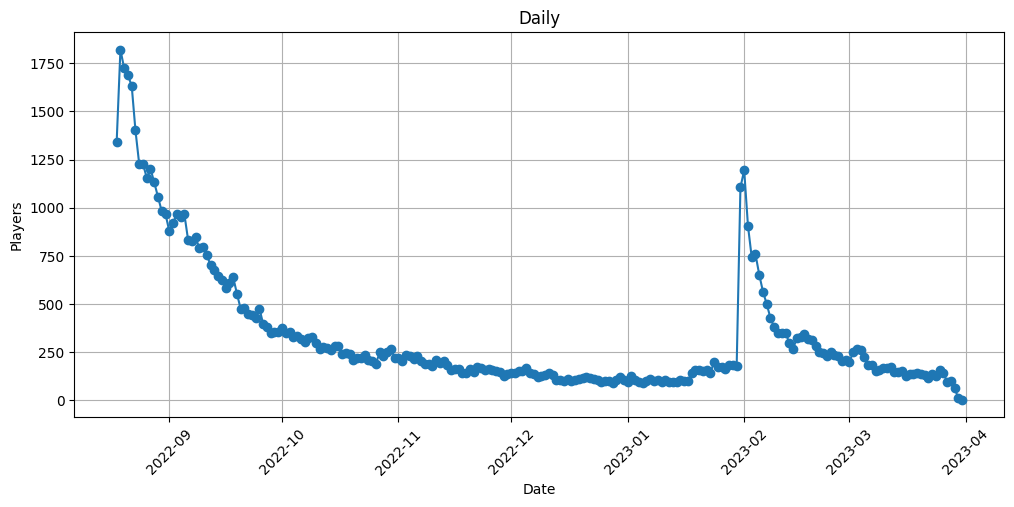

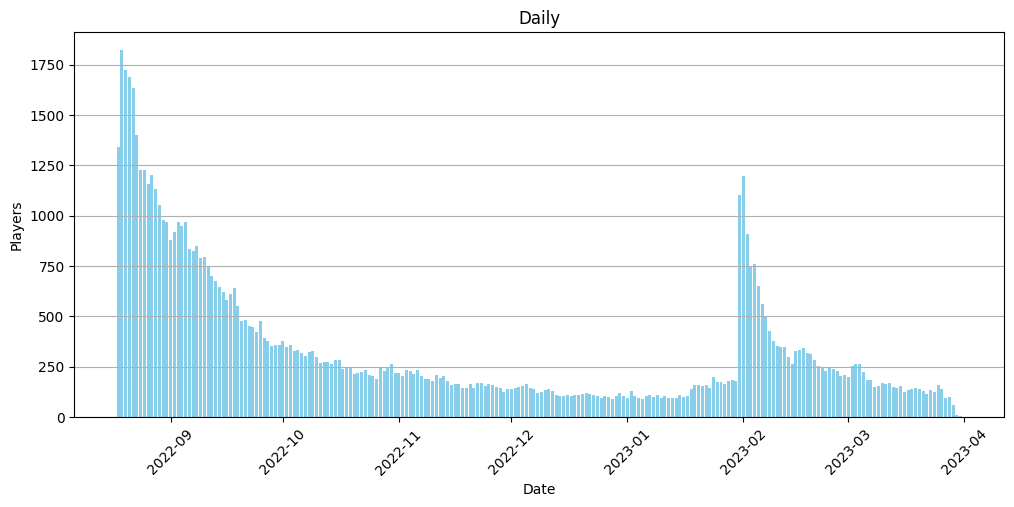

In [47]:
analyze_daily_active_users("C:\\Users\\El Presidente\\Desktop\\College\\GA_25_P1_Part3_Shane_Conroy\\player_logged_in.csv")

In [48]:
def analyze_monthly_active_users(filepath):

    data = pd.read_csv(filepath, parse_dates=['Time'], dayfirst=True)
    
    if 'Time' not in data.columns or 'pid' not in data.columns:
        print("Error: CSV must contain 'Time' and 'pid' columns.")
        return

    data['YearMonth'] = data['Time'].dt.to_period('M')

    mau = data.groupby('YearMonth')['pid'].nunique()

    mau.index = mau.index.astype(str)

    plot_mau(mau, plot_type='line')
    plot_mau(mau, plot_type='bar')

def plot_mau(mau, plot_type='line'):
    plt.figure(figsize=(12, 5))

    if plot_type == 'line':
        plt.plot(mau.index, mau.values, marker='o', linestyle='-')
        plt.grid(True)
    elif plot_type == 'bar':
        plt.bar(mau.index, mau.values, color='skyblue')
        plt.grid(axis='y')

    plt.xlabel("Month")
    plt.ylabel("Unique players amount")
    plt.title("Monthly users")
    plt.xticks(rotation=45)
    plt.show()



C:\Users\El Presidente\AppData\Local\Temp\ipykernel_11436\2308155311.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data = pd.read_csv(filepath, parse_dates=['Time'], dayfirst=True)


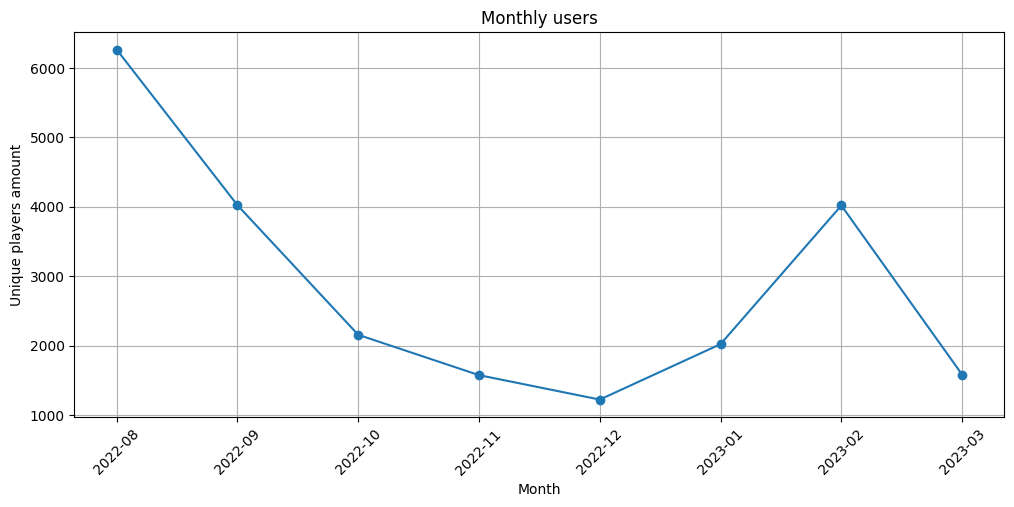

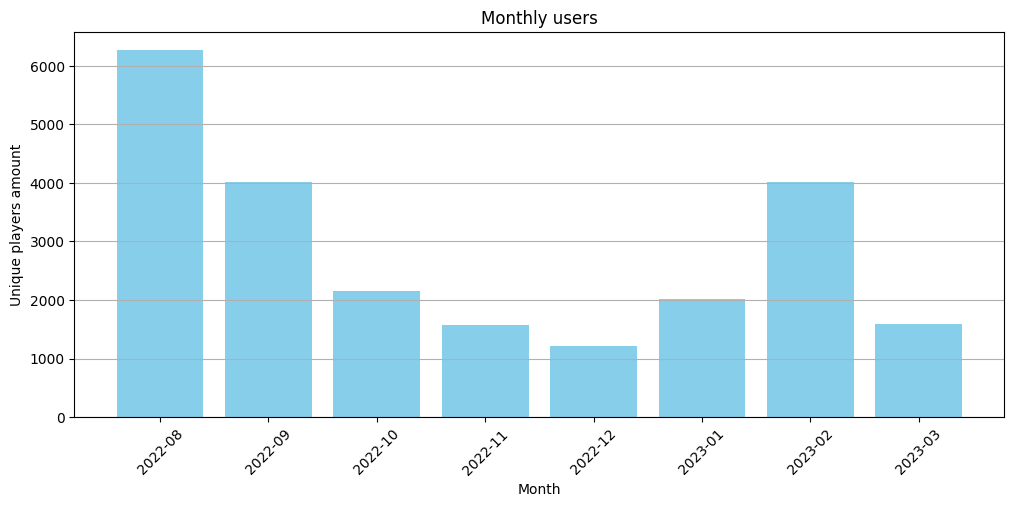

In [49]:
analyze_monthly_active_users("C:\\Users\\El Presidente\\Desktop\\College\\GA_25_P1_Part3_Shane_Conroy\\player_logged_in.csv")

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_stickiness(filepath):
    data = pd.read_csv(filepath, parse_dates=['Time'], dayfirst=True)
    
    if 'Time' not in data.columns or 'pid' not in data.columns:
        print("Error: CSV must contain 'Time' and 'pid' columns.")
        return
    
    data['Date'] = data['Time'].dt.date
    data['YearMonth'] = data['Time'].dt.to_period('M')
    
    dau = data.groupby('Date')['pid'].nunique()

    mau = data.groupby('YearMonth')['pid'].nunique()

    dau.index = pd.to_datetime(dau.index).to_period('M')
    stickiness = []

    for month in mau.index:
        month_dau = dau[dau.index == month]
    
        avg_dau = month_dau.mean()

        month_mau = mau[month]

        if month_mau > 0:
            stickiness.append(avg_dau / month_mau)
        else:
            stickiness.append(0)

    stickiness_series = pd.Series(stickiness, index=mau.index)

    print(stickiness_series)

    plot_stickiness(stickiness_series)

def plot_stickiness(stickiness):
    plt.figure(figsize=(12, 5))
    plt.plot(stickiness.index.astype(str), stickiness.values, marker='o', linestyle='-', color='orange')
    plt.grid(True)
    plt.xlabel("Month")
    plt.ylabel("Stickiness (DAU / MAU)")
    plt.title("Stickiness Over Time (DAU / MAU)")
    plt.xticks(rotation=45)
    plt.show()


C:\Users\El Presidente\AppData\Local\Temp\ipykernel_11436\3393804070.py:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data = pd.read_csv(filepath, parse_dates=['Time'], dayfirst=True)


YearMonth
2022-08    0.211560
2022-09    0.158760
2022-10    0.125619
2022-11    0.113130
2022-12    0.098147
2023-01    0.079935
2023-02    0.102405
2023-03    0.093451
Freq: M, dtype: float64


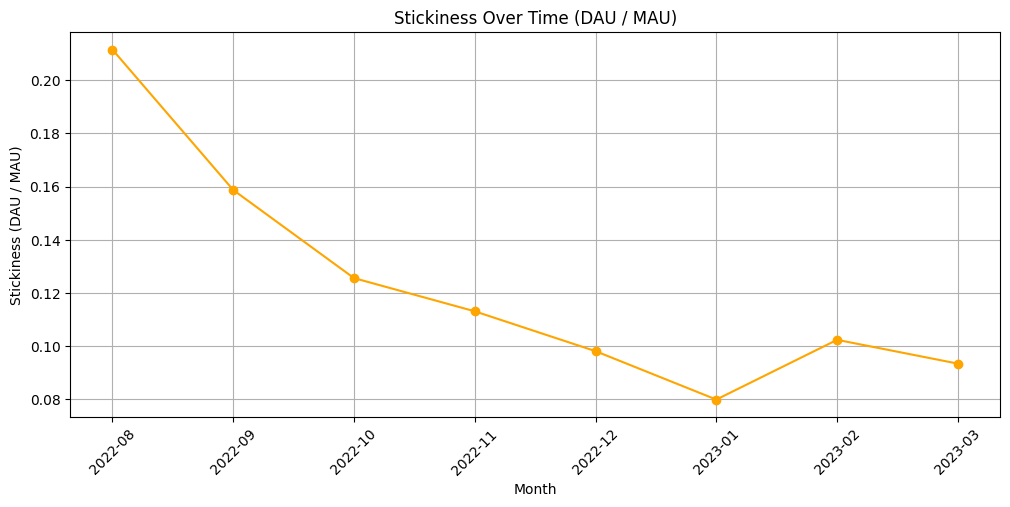

In [51]:
analyze_stickiness("C:\\Users\\El Presidente\\Desktop\\College\\GA_25_P1_Part3_Shane_Conroy\\player_logged_in.csv")

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_sessions_played():

    #playersLogin = pd.read_csv("C:\\Users\\gameuser\\Desktop\\Foldera\\College\\S2\\GA\\GA_25_P1_Part3_Shane_Conroy\\data\\player_logged_in.csv", parse_dates=["Time"])
    playersLogin = pd.read_csv("C:\\Users\\El Presidente\\Desktop\\College\\GA_25_P1_Part3_Shane_Conroy\\player_logged_in.csv", parse_dates=["Time"])
    playersLogin = playersLogin.rename(columns={"Time": "LoginTime"})  # Renaming for clarity
    #playersLogout = pd.read_csv("C:\\Users\\gameuser\\Desktop\\Foldera\\College\\S2\\GA\\GA_25_P1_Part3_Shane_Conroy\\data\\exited_game.csv", parse_dates=["Time"])
    playersLogout = pd.read_csv("C:\\Users\\El Presidente\\Desktop\\College\\GA_25_P1_Part3_Shane_Conroy\\exited_game.csv", parse_dates=["Time"])
    playersLogout = playersLogout.rename(columns={"Time": "LogoutTime"})  # Renaming for clarity


    sessions = pd.merge(playersLogin, playersLogout, on='pid', how='inner')


    sessions['SessionDuration'] = (sessions['LogoutTime'] - sessions['LoginTime']).dt.total_seconds()

    total_sessions = sessions.shape[0]
    print(f"Total Sessions Played: {total_sessions}")



    median_session_duration = sessions['SessionDuration'].median()
    print(f"Median Session Duration: {median_session_duration / 60:.2f} minutes")  # Converted to minutes

    sessions['YearMonth'] = sessions['LoginTime'].dt.to_period('M')
    sessions_per_user_month = sessions.groupby(['YearMonth', 'pid']).size().reset_index(name='Sessions')

    avg_sessions_per_user = sessions_per_user_month.groupby('YearMonth')['Sessions'].mean()
    print(f"Average Sessions per User per Month: \n{avg_sessions_per_user}")

    total_sessions_per_month = sessions.groupby('YearMonth').size()

    median_session_duration_per_month = sessions.groupby('YearMonth')['SessionDuration'].median()




    plt.figure(figsize=(12, 5))
    total_sessions_per_month.plot(kind='line', marker='o', color='blue')
    plt.title("Total Sessions Played Over Time")
    plt.xlabel("Month")
    plt.ylabel("Total Sessions")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 5))
    median_session_duration_per_month.plot(kind='line', marker='o', color='green')
    plt.title("Median Session Duration Over Time")
    plt.xlabel("Month")
    plt.ylabel("Median Session Duration (seconds)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 5))
    avg_sessions_per_user.plot(kind='line', marker='o', color='orange')
    plt.title("Average Sessions per User per Month")
    plt.xlabel("Month")
    plt.ylabel("Average Sessions per User")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


Total Sessions Played: 3741028
Median Session Duration: 32.50 minutes
Average Sessions per User per Month: 
YearMonth
2022-08    119.976400
2022-09    288.518351
2022-10    268.279460
2022-11    247.617985
2022-12    191.311367
2023-01    133.919363
2023-02     69.555248
2023-03     72.874362
Freq: M, Name: Sessions, dtype: float64


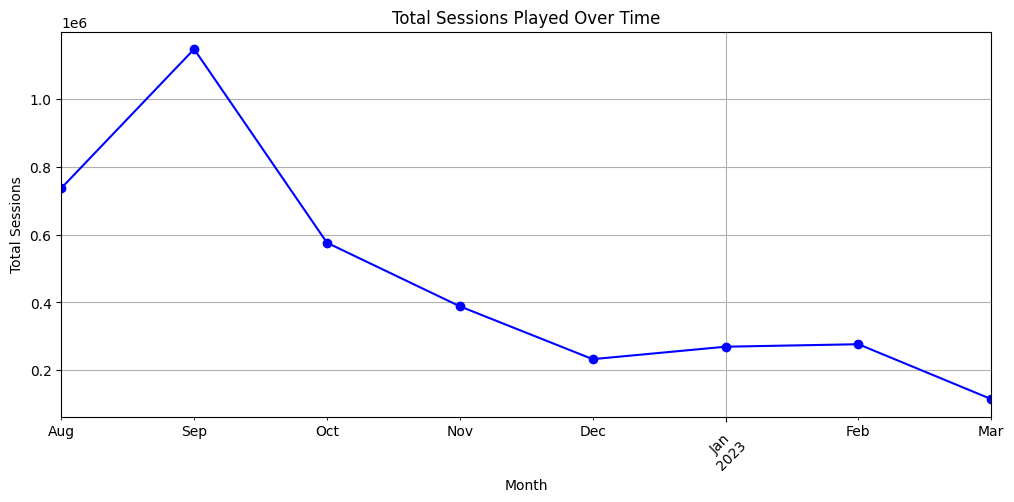

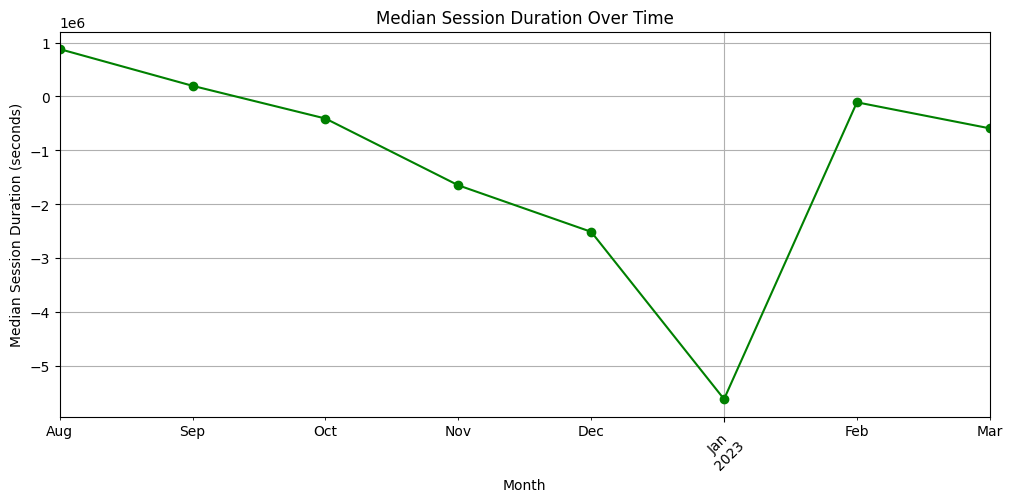

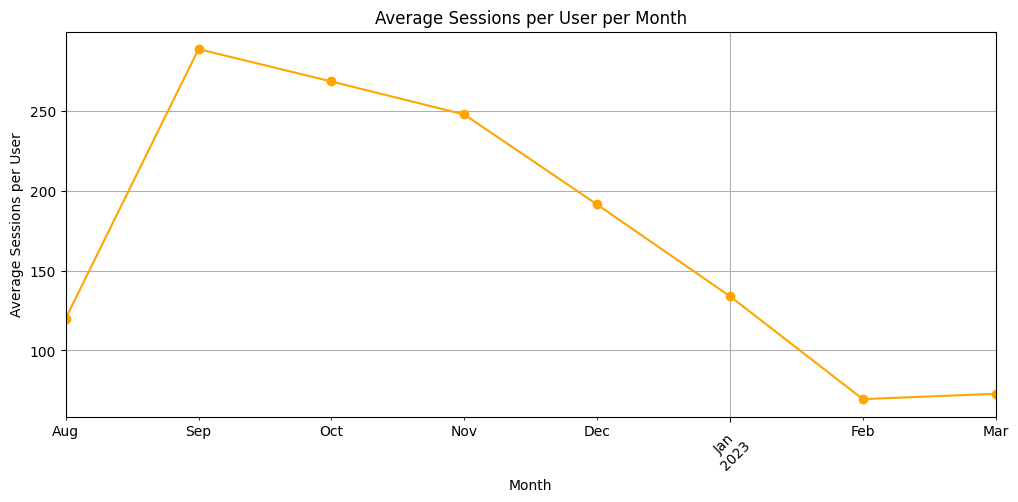

In [53]:
analyze_sessions_played()

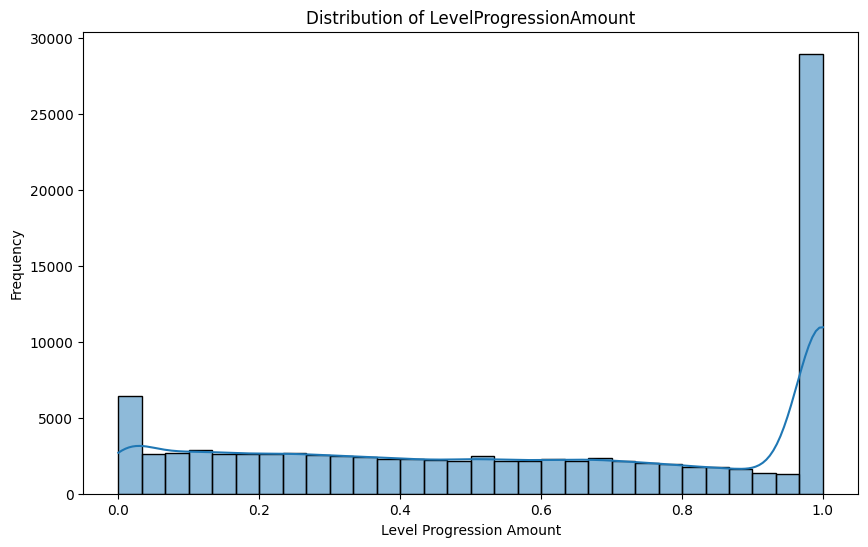

In [54]:
import seaborn as sns

file_path = "C:\\Users\\El Presidente\\Desktop\\College\\GA_25_P1_Part3_Shane_Conroy\\exited_game.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
sns.histplot(df['LevelProgressionAmount'], bins=30, kde=True)
plt.title('Distribution of LevelProgressionAmount')
plt.xlabel('Level Progression Amount')
plt.ylabel('Frequency')
plt.show()


Big spike at the end because ppl will usually play through a whole level, small spike at start bc ppl more likely to drop it earlier

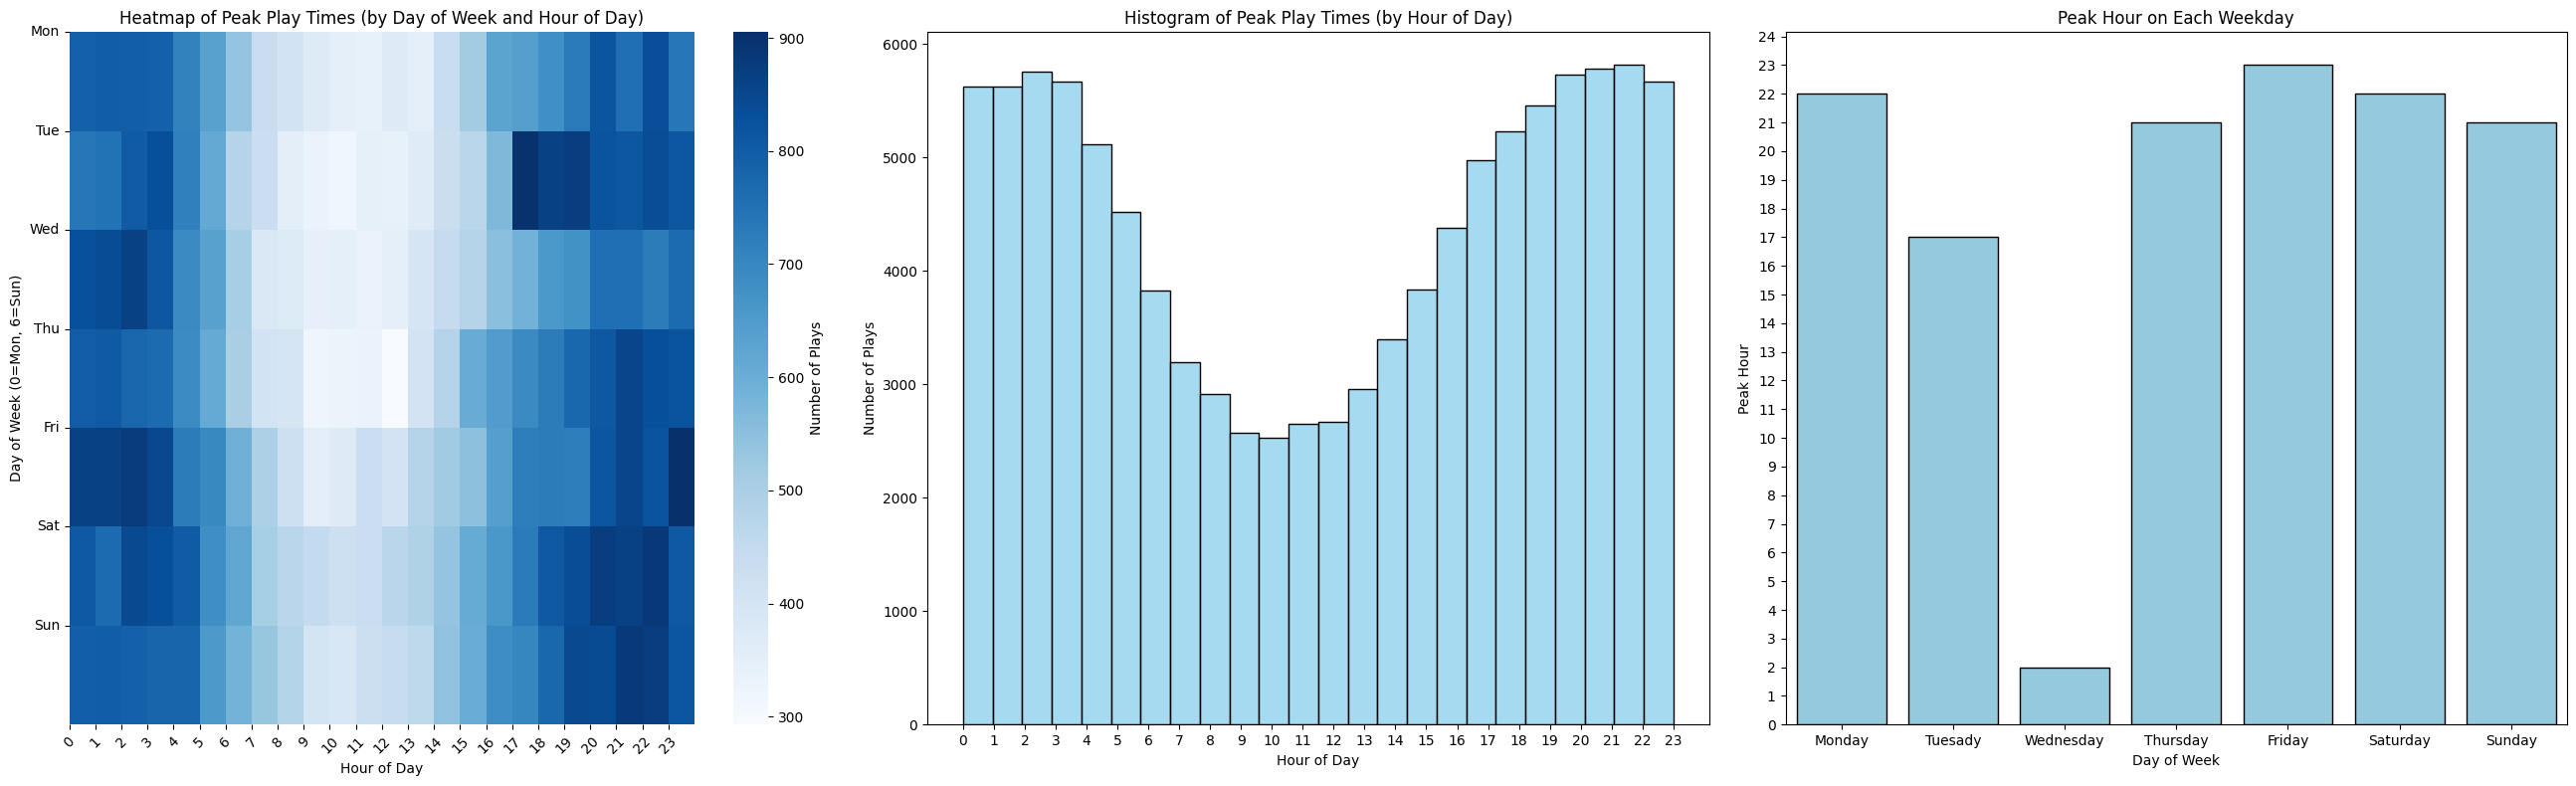

In [65]:
file_path = "C:\\Users\\El Presidente\\Desktop\\College\\GA_25_P1_Part3_Shane_Conroy\\exited_game.csv"
df = pd.read_csv(file_path)

df['Time_utc'] = pd.to_datetime(df['Time_utc'], errors='coerce')

df['Hour'] = df['Time_utc'].dt.hour
df['DayOfWeek'] = df['Time_utc'].dt.dayofweek

heatmap_data = df.groupby(['DayOfWeek', 'Hour']).size().unstack(fill_value=0)

peak_hours = heatmap_data.idxmax(axis=1) # This gets the most players on each day

#fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig, axes = plt.subplots(1, 3, figsize=(26, 8))

sns.heatmap(heatmap_data, cmap='Blues', cbar_kws={'label': 'Number of Plays'}, annot=False, fmt="d", ax=axes[0])

# Heato
axes[0].set_title('Heatmap of Peak Play Times (by Day of Week and Hour of Day)')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Day of Week (0=Mon, 6=Sun)')
axes[0].set_xticks(range(24))
axes[0].set_xticklabels(range(24), rotation=45)
axes[0].set_yticks(range(7))
axes[0].set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

# Histo
axes[1].set_title('Histogram of Peak Play Times (by Hour of Day)')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Number of Plays')
axes[1].set_xticks(range(24))
sns.histplot(df['Hour'], bins=24, kde=False, color='skyblue', edgecolor='black', ax=axes[1])

# This is the new graph to get all peak hours per day you asked for in class
# peak_hours gets highest num above
sns.barplot(x=peak_hours.index, y=peak_hours.values, ax=axes[2], color='skyblue', edgecolor='black')

axes[2].set_title('Peak Hour on Each Weekday')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Peak Hour')
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(['Monday', 'Tuesady', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
axes[2].set_yticks(range(0, 25, 1))

plt.tight_layout()
plt.show()
